In [1]:
# 2023/12/17
# zhangzhong

In [2]:
import torch
from torch import nn, Tensor
from mytorch.data.mnist import MNISTDataset, FashionMNISTDataset
import matplotlib.pyplot as plt
from mytorch.data.cifar10 import CIFAR10Dataset

ModuleNotFoundError: No module named 'mytorch'

In [ ]:
mnist = MNISTDataset()

# 实现一个函数 可以画出数张指定index和数据集的图片
def plot_images(indexs, dataset):
    for index in indexs:
        img, label = dataset[index]
        plt.figure(figsize=(2, 2))
        plt.imshow(img.permute(1, 2, 0), cmap='gray')
        plt.title(f'label: {label}')
        plt.show()

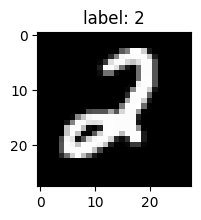

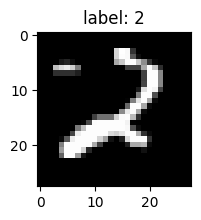

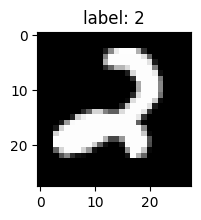

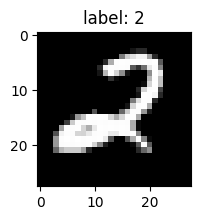

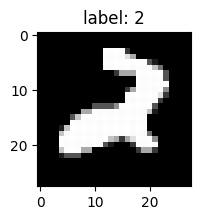

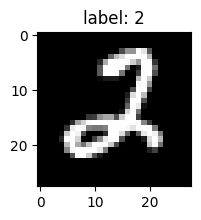

In [ ]:
plot_images([233], mnist.training_data)
plot_images([5748, 7762, 9476, 9597, 6225], mnist.testing_data)

# 接下来只需要把这些图画的漂亮一些 就行了
# 再研究一下matplotlib


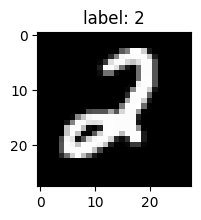

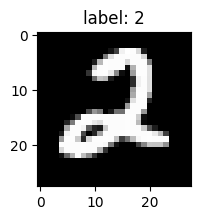

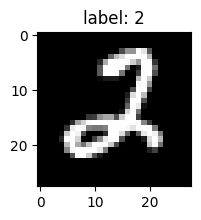

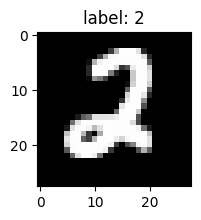

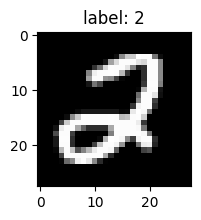

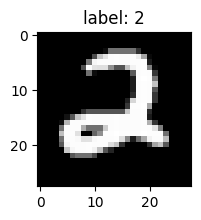

In [ ]:
plot_images([233], mnist.training_data)
# tensor([13.3098, 13.4901, 13.5093, 13.5801, 13.6209], device='cuda:0') tensor([8800, 6225, 5272, 5338, 5282], device='cuda:0')
plot_images([8800, 6225, 5272, 5338, 5282], mnist.testing_data)

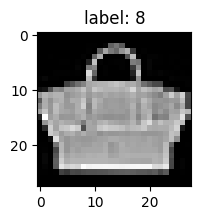

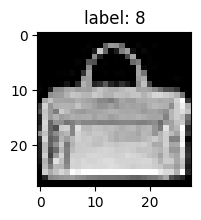

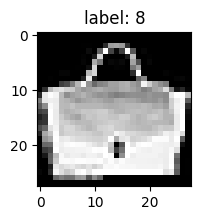

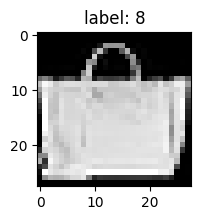

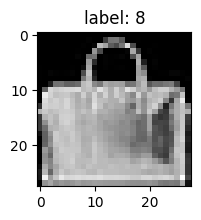

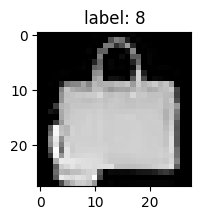

In [ ]:
fashion_mnist = FashionMNISTDataset()
plot_images([233], fashion_mnist.training_data)
# tensor([16.8595, 17.7444, 17.7592, 18.3292, 18.3688], device='cuda:1') tensor([7570, 2341, 9234, 7272, 2801], device='cuda:1')
plot_images([7570, 2341, 9234, 7272, 2801], fashion_mnist.testing_data)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


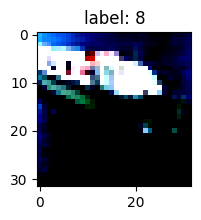

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


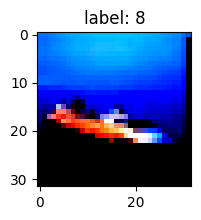

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


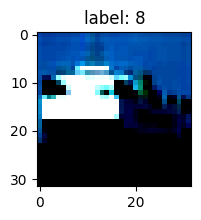

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


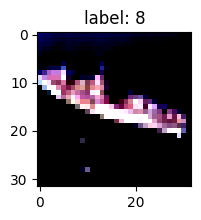

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


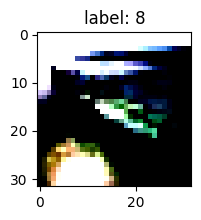

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


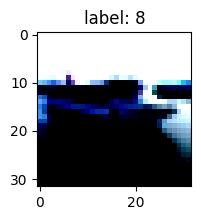

In [ ]:
# tensor([15.0364, 16.0386, 16.7409, 17.0167, 17.4135], device='cuda:2') tensor([7031, 7987, 2160, 7718, 2330], device='cuda:2')
cifar10 = CIFAR10Dataset()
plot_images([4514], cifar10.cifar_train)
plot_images([1366, 7868,  789, 7050, 5138], cifar10.cifar_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


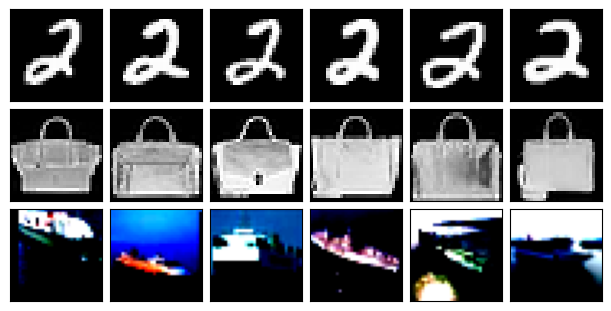

In [ ]:
# create a figure with a 3x6 grid of axes
nrows, ncols = 3, 6
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
figure, axes = plt.subplots(nrows=nrows, ncols=ncols, 
                            figsize=(6, 3), layout='constrained')
# for ax in axes:
#     print(type(ax))
#     # ax.plot([1, 2, 3, 4], [1, 4, 2, 3])
# 原来如此！axes是一个二维数组
# 只能构建一个img的二维数组了
searching_image_indices = [233, 233, 4514]
matching_image_indices = [[8800, 6225, 5272, 5338, 5282],
                          [7570, 2341, 9234, 7272, 2801],
                          [1366, 7868,  789, 7050, 5138]]
train_datasets = [mnist.training_data, fashion_mnist.training_data, cifar10.cifar_train]
test_datasets = [mnist.testing_data, fashion_mnist.testing_data, cifar10.cifar_test]
imgs = [[ train_datasets[i][searching_image_indices[i]][0] ] + 
        [ test_datasets[i][matching_image_indices[i][j]][0] for j in range(ncols-1) ]
        for i in range(nrows)]

img = mnist.training_data[233][0].permute(1, 2, 0)
for i in range(nrows):
    for j in range(ncols):
        axes[i][j].imshow(imgs[i][j].permute(1, 2, 0), cmap='gray')
        axes[i][j].xaxis.set_visible(False)
        axes[i][j].yaxis.set_visible(False)